# **Wine Quality Prediction**

### Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests
## **Dataset link : https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009**

## Dataset description : Input variables
### 1 - fixed acidity

###2 - volatile acidity

###3 - citric acid

###4 - residual sugar

###5 - chlorides

###6 - free sulfur dioxide

###7 - total sulfur dioxide

###8 - density

###9 - pH

###10 - sulphates

###11 - alcohol

###Output variable (based on sensory data):

###12 - quality (score between 0 and 10)

###These datasets can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones).

In [27]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading dataset
df=pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# checking null values
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# printing features data type
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
# list of feature columns
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [8]:
# describing the statistics of the given dataset
print(df.describe())

       fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]


In [11]:
# displaying total number of duplicate rows/samples
df.duplicated().sum()

240

In [9]:
# finding a correlation between the feature columns
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


## Visualization

### visually displaying the correlation between the feature columns

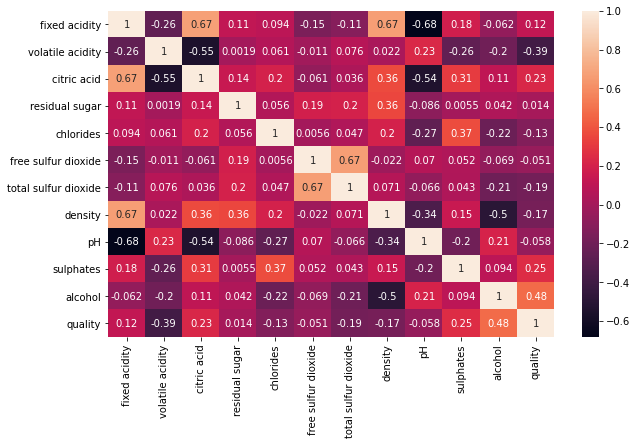

In [10]:
# figure size
fig = plt.figure(figsize = (10,6))

sns.heatmap(df.corr(), annot=True)

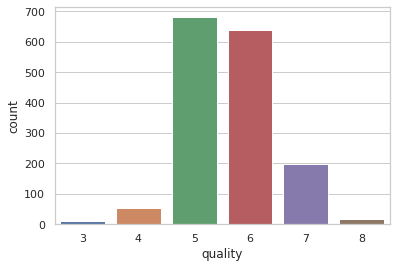

In [12]:
sns.set(style="whitegrid")

sns.countplot('quality', data=df)

In [13]:
# storing a list of column
col = df.columns
print(col)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


<Figure size 2880x2880 with 0 Axes>

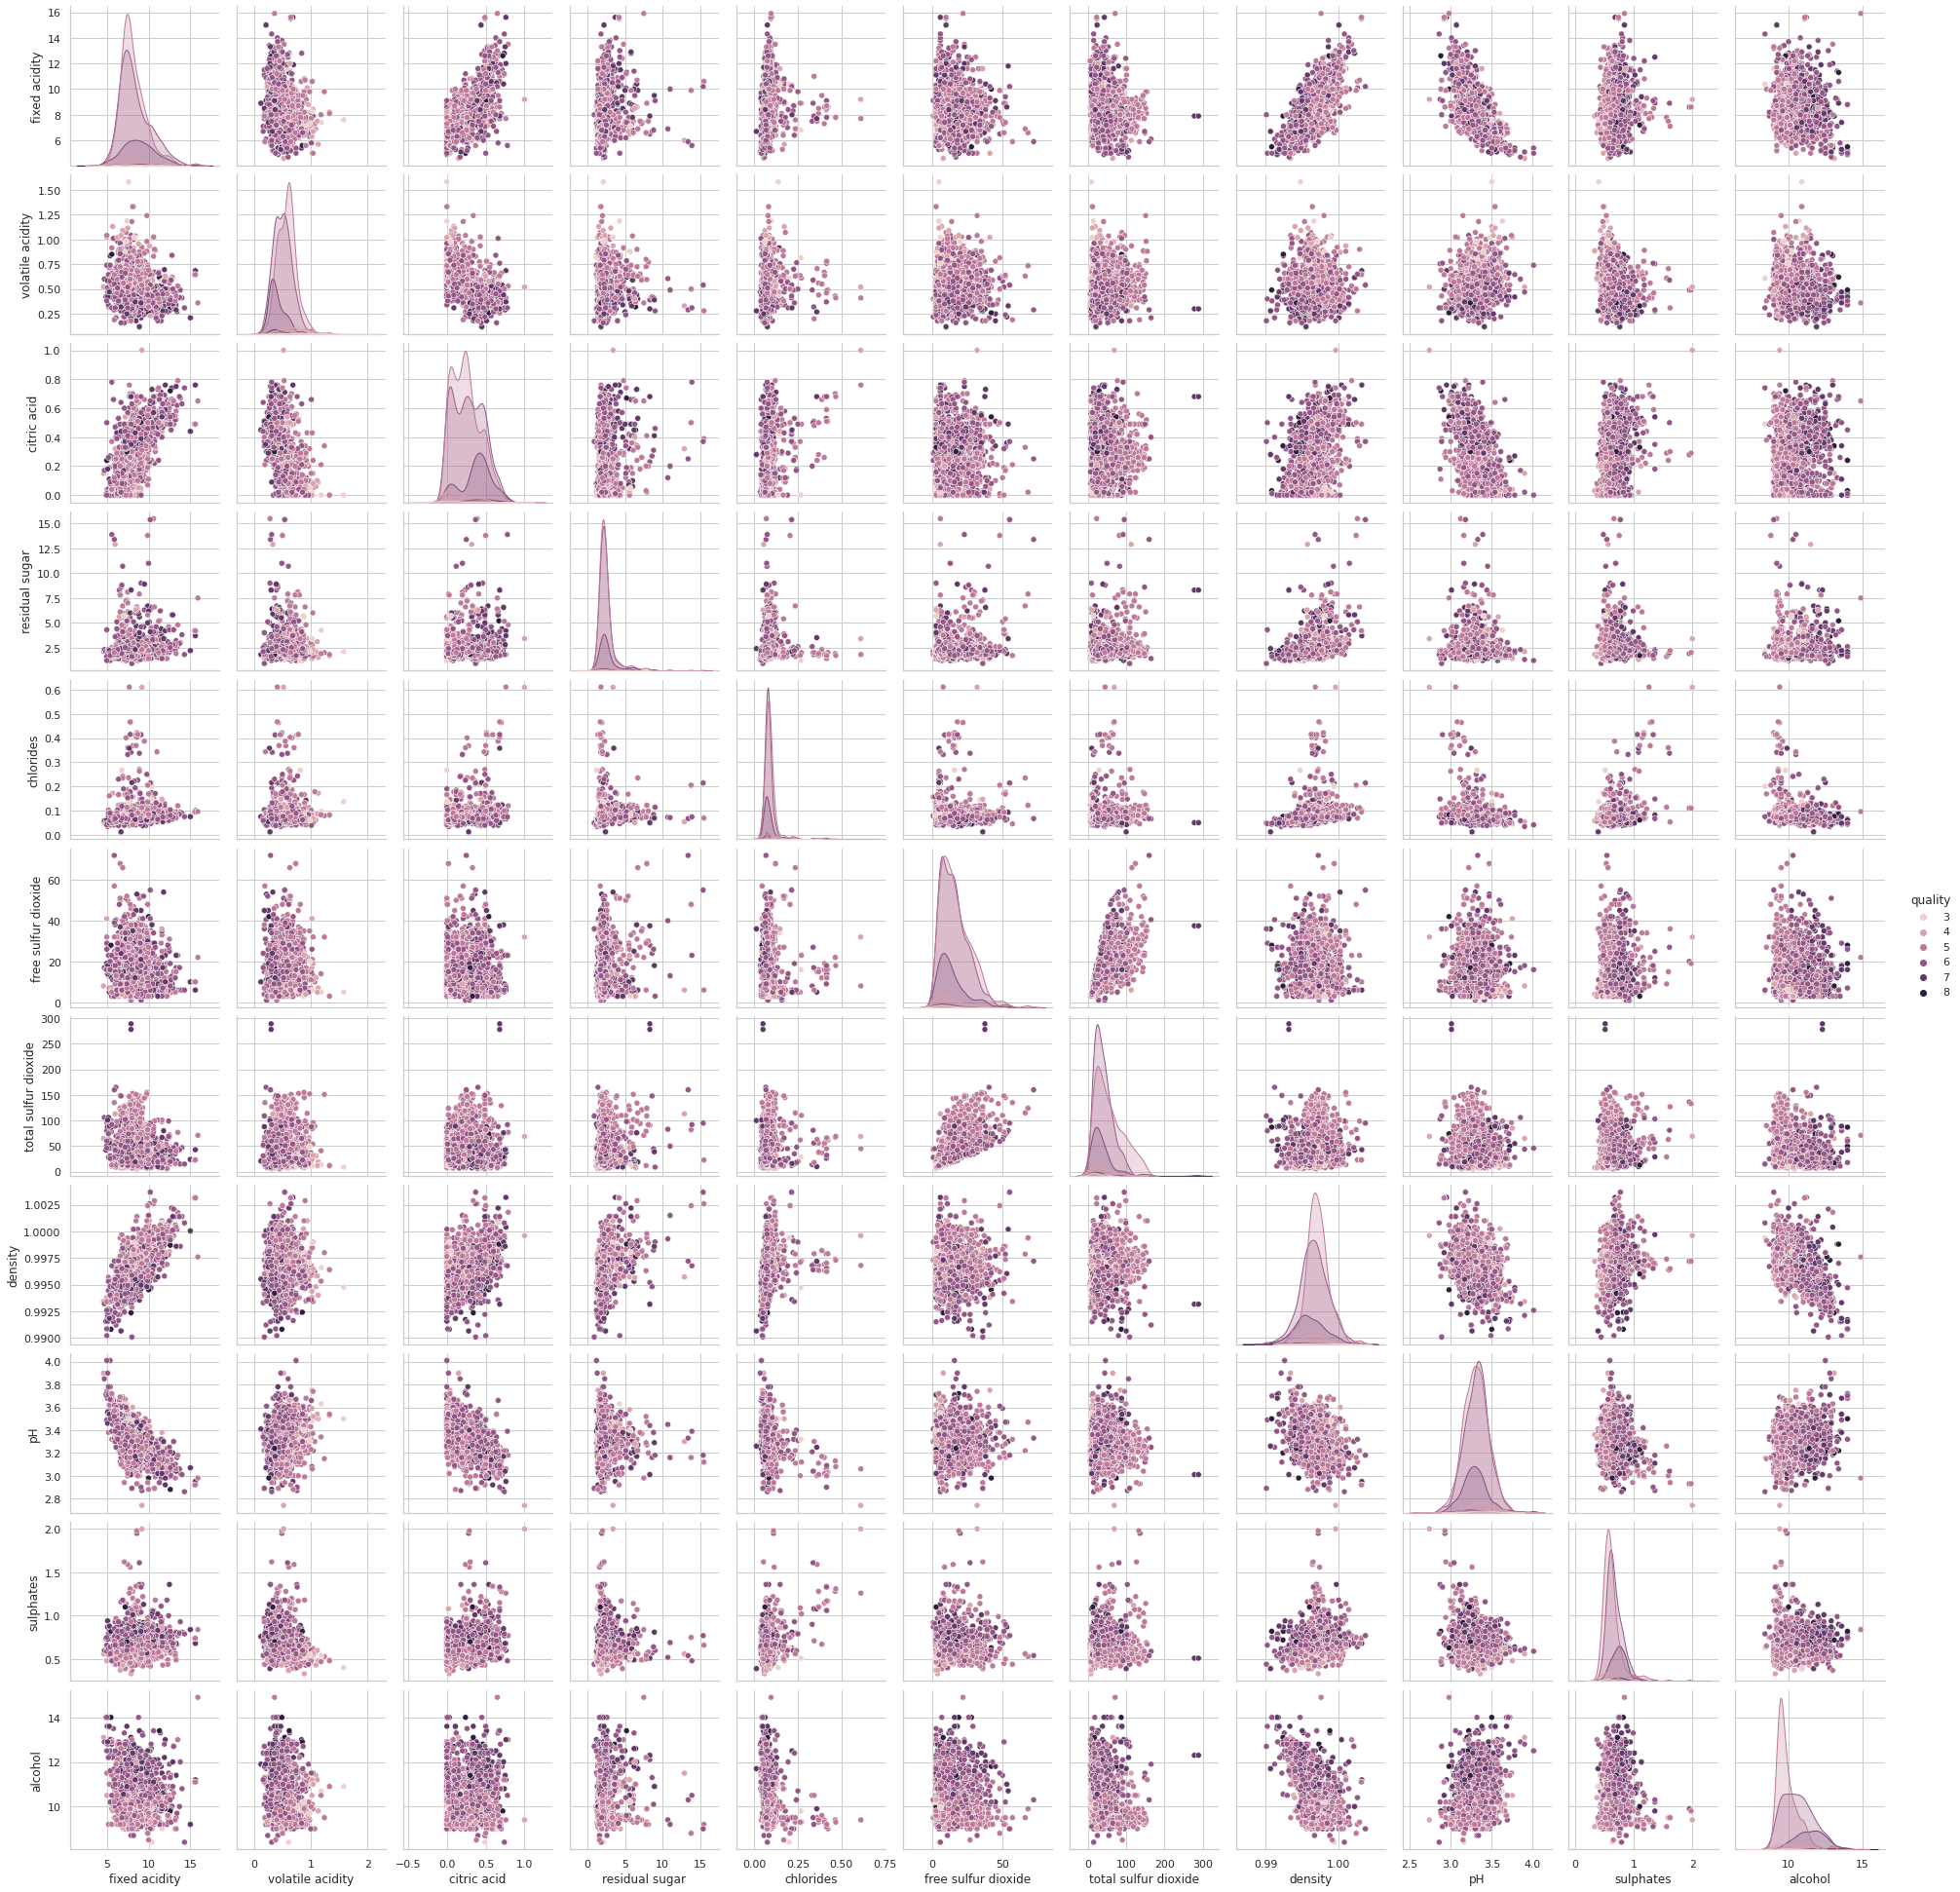

In [14]:
fig= plt.figure(figsize=(40, 40))

sns.pairplot(df, hue='quality', hue_order=col)

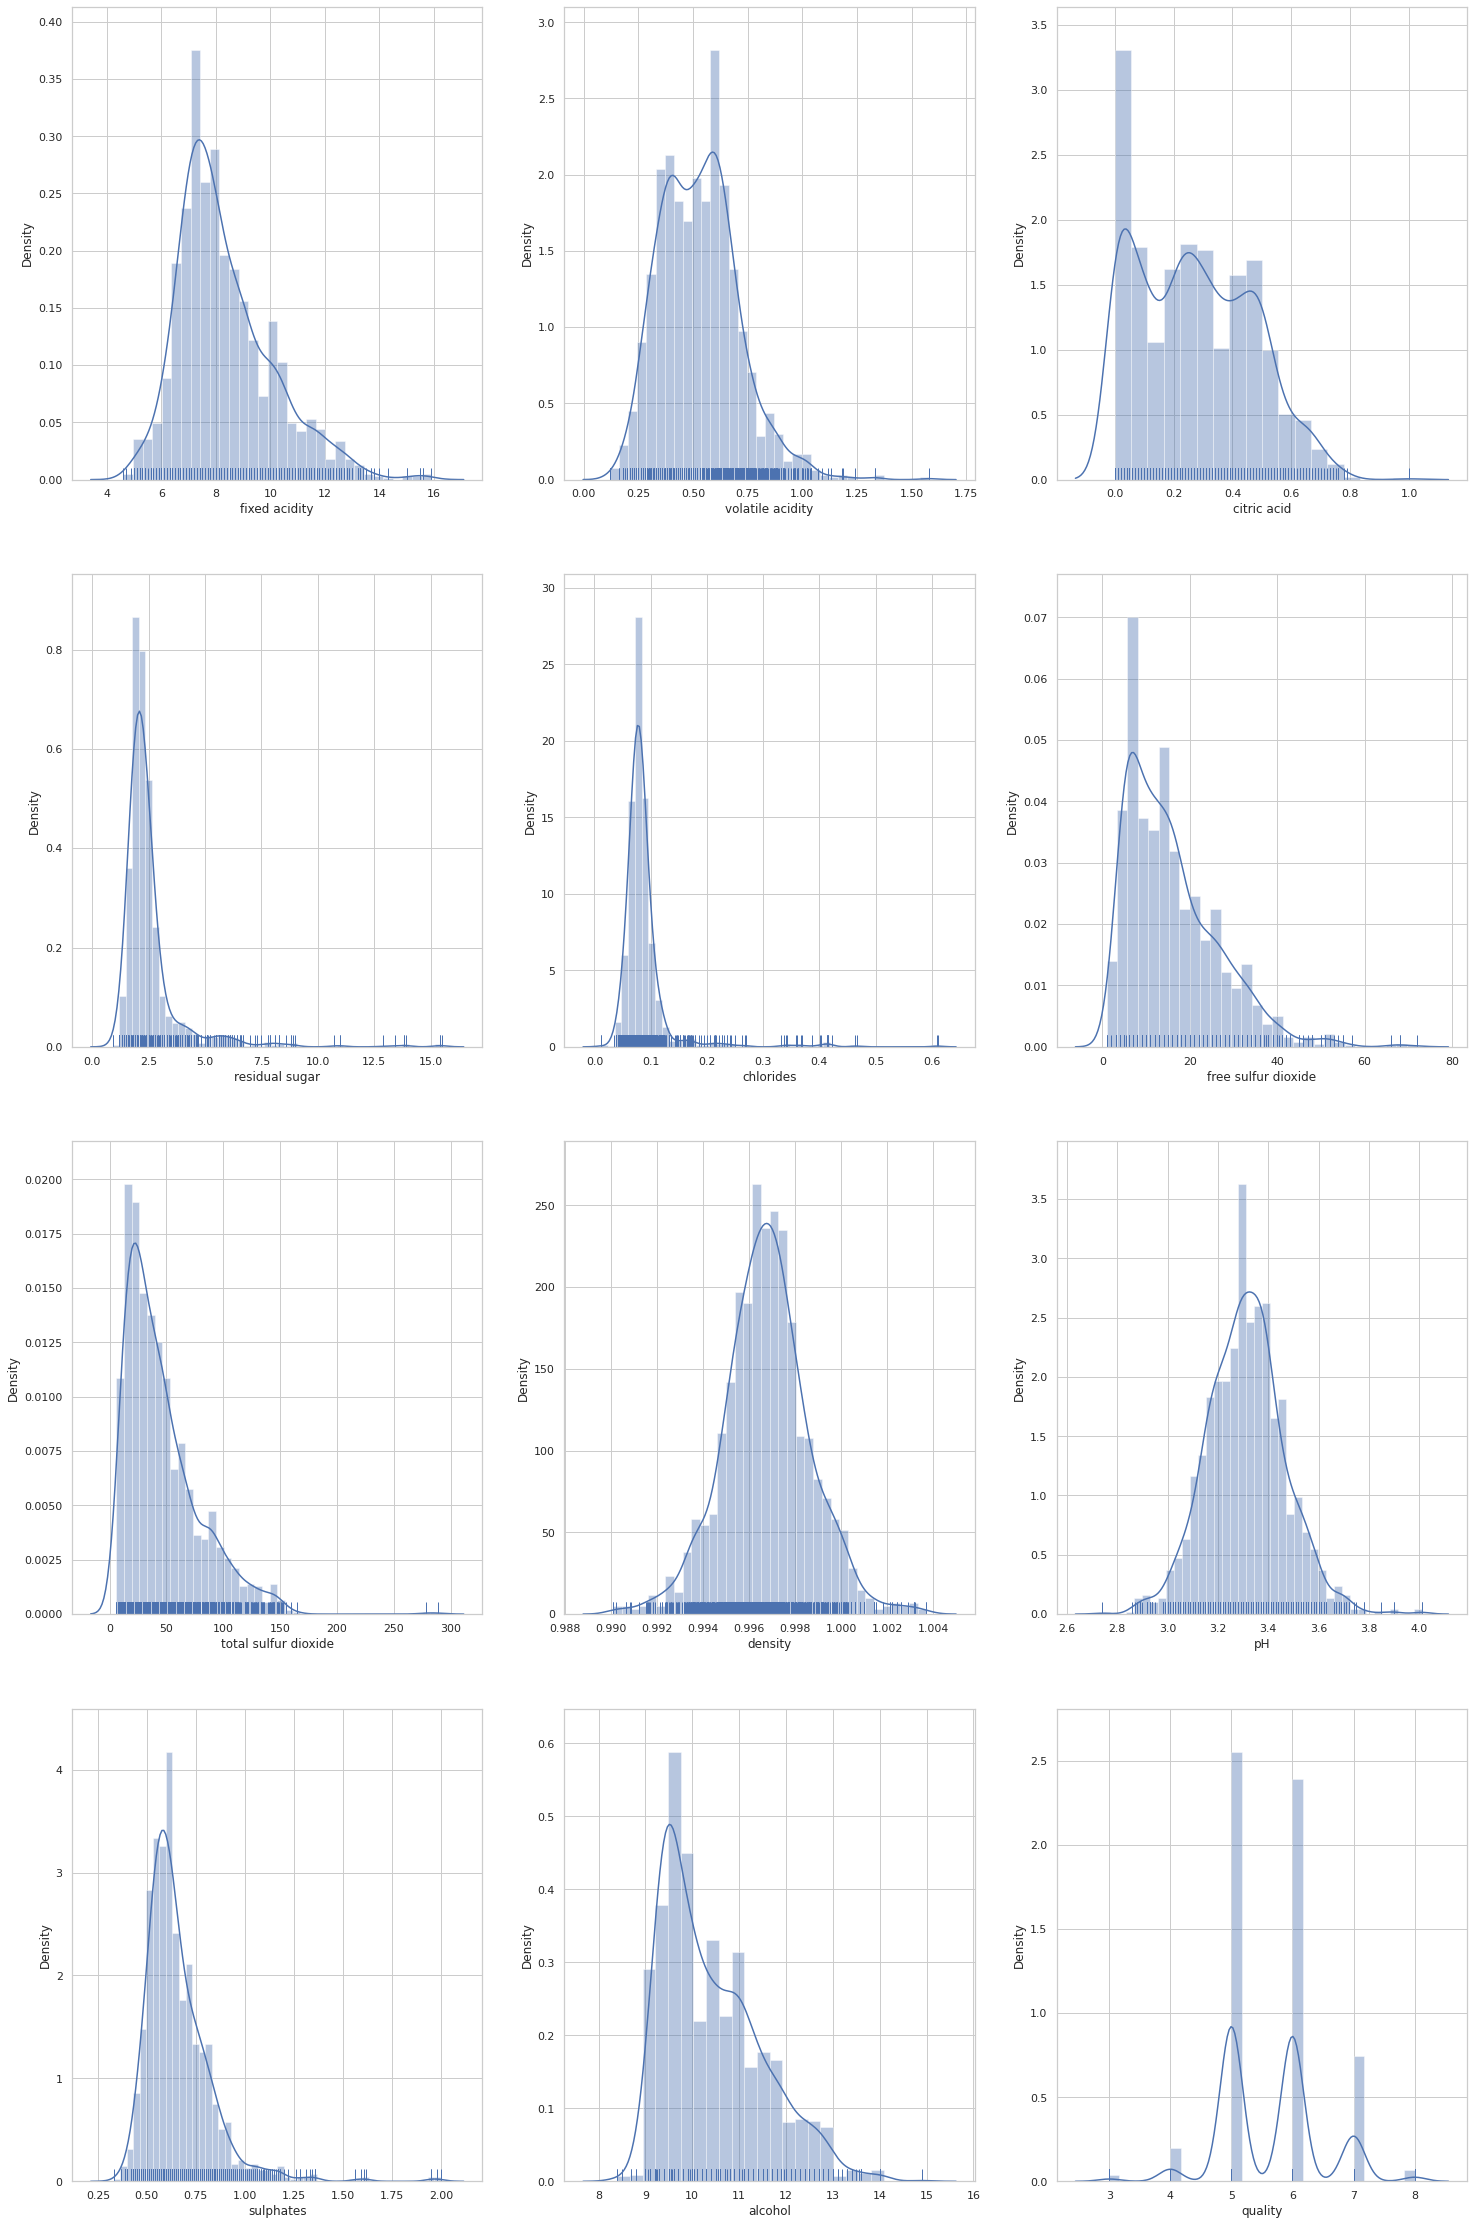

In [15]:
fig, ax = plt.subplots(4, 3, figsize=(25, 40))
k = 0

for i in range(4):
  for j in range(3):

    sns.distplot(df[col[k]], rug=True, axlabel=col[k], ax=ax[i][j])
    k += 1

###Some of the columns are highly skewed towards the right. So we have to apply a log transform to get a normal distribution.


In [16]:
# applying log transformation
df['residual sugar'] = df['residual sugar'].apply(np.log)
df['chlorides'] = df['chlorides'].apply(np.log)
df['free sulfur dioxide'] = df['free sulfur dioxide'].apply(np.log)
df['total sulfur dioxide'] = df['total sulfur dioxide'].apply(np.log)
df['sulphates'] = df['sulphates'].apply(np.log)
df['alcohol'] = df['alcohol'].apply(np.log)

### result after applying log transformation

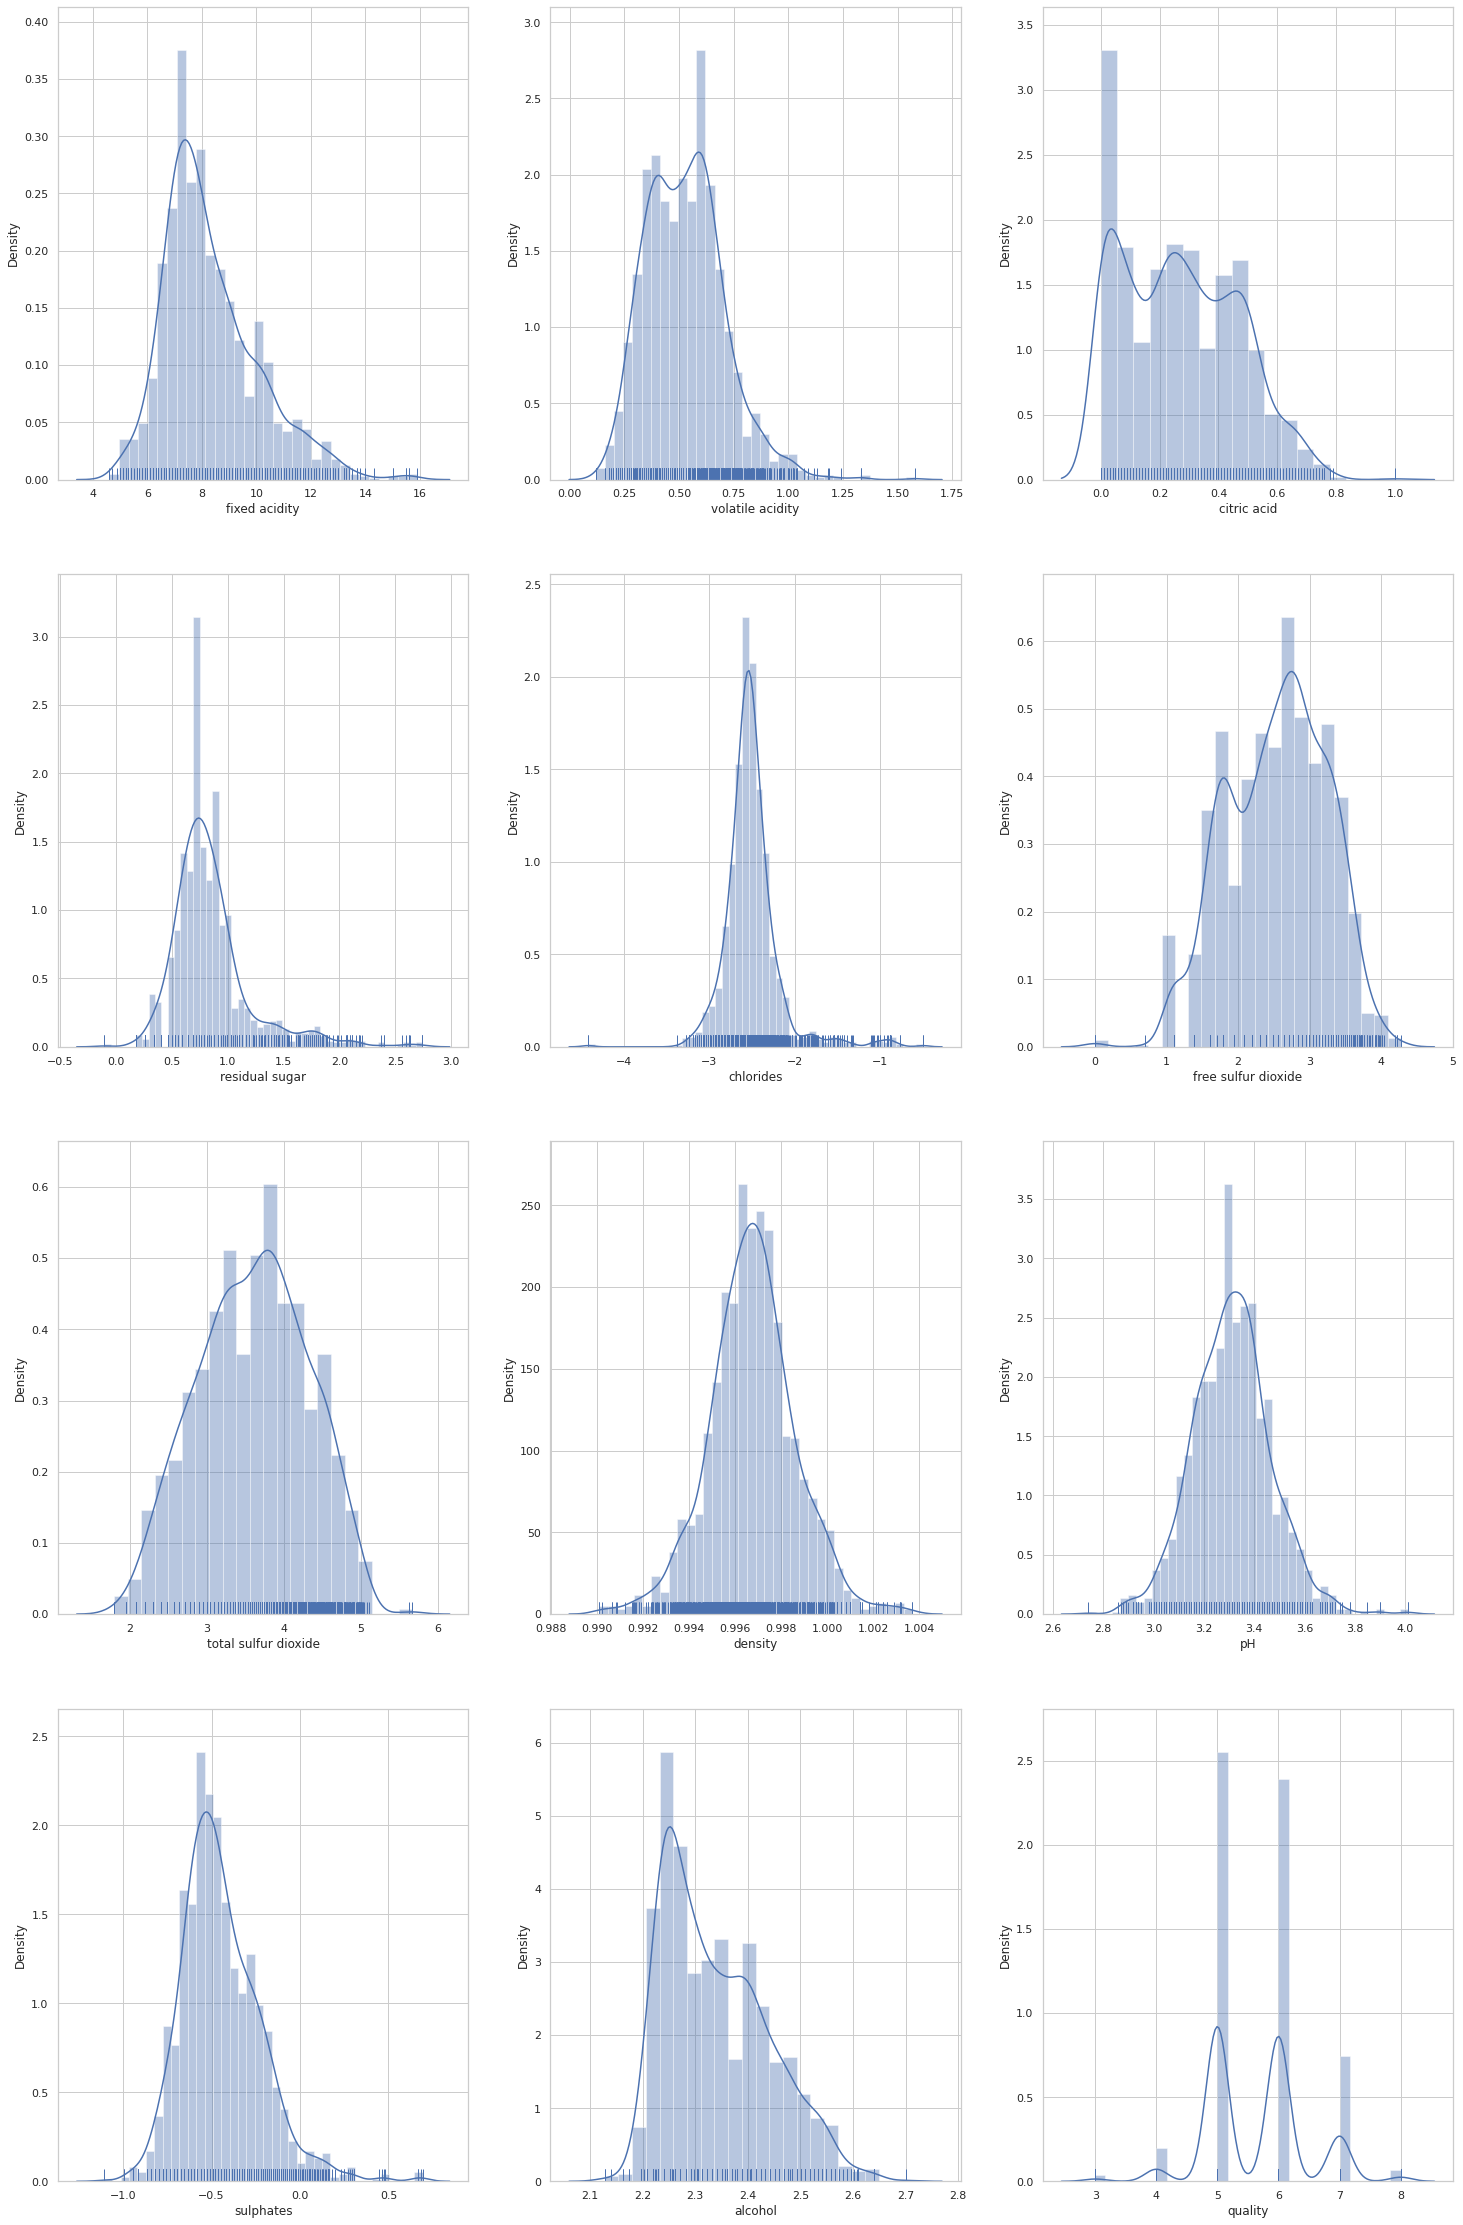

In [17]:
fig, ax = plt.subplots(4, 3, figsize=(25, 40))
k = 0

for i in range(4):
  for j in range(3):

    sns.distplot(df[col[k]], rug=True, axlabel=col[k], ax=ax[i][j])
    k += 1

In [18]:
# correlation between output and input feature
df.corr()['quality'].sort_values(ascending=False)[1:]

alcohol                 0.476981
sulphates               0.308642
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.023533
free sulfur dioxide    -0.050087
pH                     -0.057731
total sulfur dioxide   -0.170143
density                -0.174919
chlorides              -0.176140
volatile acidity       -0.390558
Name: quality, dtype: float64

In [19]:
# creating X-->input feature vector and y-->output feature vector

X = df.drop('quality', axis = 1)
y = df['quality']

In [21]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=21)

In [22]:
# normalizing the dataset

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Aplplying Machine Learning model

In [25]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()

# fitting the model to the training set
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [31]:
# predicting output
prediction = lgbm.predict(X_test)

lgbm_acc = accuracy_score(y_test, prediction)
print(f"Accuracy Score of Training Data is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Accuracy Score of Testing  Data is {lgbm_acc}")

Accuracy Score of Training Data is 1.0
Accuracy Score of Testing  Data is 0.6925


In [32]:
print("\n Train Data: LGBM_Confusion Matrix:\n ")
print(confusion_matrix(y_train, lgbm.predict(X_train)))

print("\n Train Data: LGBM_Classification Report:\n ")
print(classification_report(y_train, lgbm.predict(X_train)))


 Train Data: LGBM_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 523   0   0   0]
 [  0   0   0 471   0   0]
 [  0   0   0   0 146   0]
 [  0   0   0   0   0  15]]

 Train Data: LGBM_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       523
           6       1.00      1.00      1.00       471
           7       1.00      1.00      1.00       146
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



In [33]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.1, loss = 'deviance', n_estimators = 100, max_dept=25)
xgb.fit(X_train, y_train)

# predicting output over the test set
prediction = xgb.predict(X_test)

xgb_acc = accuracy_score(y_test, prediction)

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Accuracy Score of Training Data is {xgb_acc}\n")

Accuracy Score of Training Data is 0.8131776480400333
Accuracy Score of Training Data is 0.655



In [34]:
print("\n Train Data: xgboost_Confusion Matrix:\n ")
print(confusion_matrix(y_train, xgb.predict(X_train)))

print("\n Train Data: xgboost_Classification Report:\n ")
print(classification_report(y_train, xgb.predict(X_train)))


 Train Data: xgboost_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  16  14   5   1   0]
 [  0   0 459  62   2   0]
 [  0   0  81 379  11   0]
 [  0   0   4  37 105   0]
 [  0   0   0   4   3   8]]

 Train Data: xgboost_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      0.44      0.62        36
           5       0.82      0.88      0.85       523
           6       0.78      0.80      0.79       471
           7       0.86      0.72      0.78       146
           8       1.00      0.53      0.70        15

    accuracy                           0.81      1199
   macro avg       0.91      0.73      0.79      1199
weighted avg       0.82      0.81      0.81      1199



In [35]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier()
parameters = {
    'min_samples_split' : [2, 3, 4, 5],
    'max_depth' : [10, 15, 20, 25],
    'n_estimators' : [90, 100, 110, 120]
}



grid_search = GridSearchCV(rf, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [36]:
# best paramters 
grid_search.best_params_

{'max_depth': 15, 'min_samples_split': 3, 'n_estimators': 100}

In [37]:
grid_search.best_score_

0.690546218487395

In [38]:
rf = RandomForestClassifier(max_depth = 15, min_samples_split = 3, n_estimators = 100)
rf.fit(X_train, y_train)

prediction = rf.predict(X_test)

rf_acc = accuracy_score(y_test, prediction)

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracy Score of Testing Data is {rf_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Testing Data is 0.685



In [39]:
print("\n Train Data: RandomForestClassifier_Confusion Matrix:\n ")
print(confusion_matrix(y_train, rf.predict(X_train)))

print("\n Train Data: RandomForestClassifier_Classification Report:\n ")
print(classification_report(y_train, rf.predict(X_train)))


 Train Data: RandomForestClassifier_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 523   0   0   0]
 [  0   0   0 471   0   0]
 [  0   0   0   0 146   0]
 [  0   0   0   0   0  15]]

 Train Data: RandomForestClassifier_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       523
           6       1.00      1.00      1.00       471
           7       1.00      1.00      1.00       146
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



In [40]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
parameters = {
    'min_samples_split' : [2, 3, 4, 5, 6],
    'min_samples_leaf' : [1, 2, 3, 4],
    'n_estimators' : [80, 90, 100, 110, 120]
}

grid_search = GridSearchCV(gb, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [41]:
grid_search.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 120}

In [42]:
grid_search.best_score_

0.6572128851540617

In [43]:
gb = GradientBoostingClassifier(min_samples_leaf = 1, min_samples_split = 6, n_estimators = 120)
gb.fit(X_train, y_train)

prediction = gb.predict(X_test)

gb_acc = accuracy_score(y_test, prediction)

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Accuracy Score of Testing Data is {gb_acc}\n")

Accuracy Score of Training Data is 0.9224353628023353
Accuracy Score of Testing Data is 0.65



In [44]:
print("\n Train Data: GradientBoostingClassifier_Confusion Matrix:\n ")
print(confusion_matrix(y_train, gb.predict(X_train)))

print("\n Train Data: GradientBoostingClassifier_Classification Report:\n ")
print(classification_report(y_train, gb.predict(X_train)))


 Train Data: GradientBoostingClassifier_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  34   0   2   0   0]
 [  0   0 492  30   1   0]
 [  0   0  42 429   0   0]
 [  0   0   3  15 128   0]
 [  0   0   0   0   0  15]]

 Train Data: GradientBoostingClassifier_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      0.94      0.97        36
           5       0.92      0.94      0.93       523
           6       0.90      0.91      0.91       471
           7       0.99      0.88      0.93       146
           8       1.00      1.00      1.00        15

    accuracy                           0.92      1199
   macro avg       0.97      0.95      0.96      1199
weighted avg       0.92      0.92      0.92      1199



In [45]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

prediction = etc.predict(X_test)

etc_acc = accuracy_score(y_test, prediction)

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Accuracy Score of Testing Data is {etc_acc} \n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Testing Data is 0.6775 



In [46]:
print("\n Train Data: ExtraTreesClassifier_Confusion Matrix:\n ")
print(confusion_matrix(y_train, etc.predict(X_train)))

print("\n Train Data: ExtraTreesClassifier_Classification Report:\n ")
print(classification_report(y_train, etc.predict(X_train)))


 Train Data: ExtraTreesClassifier_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 523   0   0   0]
 [  0   0   0 471   0   0]
 [  0   0   0   0 146   0]
 [  0   0   0   0   0  15]]

 Train Data: ExtraTreesClassifier_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       523
           6       1.00      1.00      1.00       471
           7       1.00      1.00      1.00       146
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
parameters = {
    'n_neighbors' : [5, 10, 15],
    'weights' : ['distance'],
    'leaf_size' : [20, 25, 30, 35]
}

grid_search = GridSearchCV(knn, parameters, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'leaf_size': [20, 25, 30, 35],
                         'n_neighbors': [5, 10, 15], 'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
grid_search.best_params_

{'leaf_size': 20, 'n_neighbors': 15, 'weights': 'distance'}

In [49]:
grid_search.best_score_

0.6663095238095239

In [50]:
knn = KNeighborsClassifier(n_neighbors = 15, leaf_size = 20, weights = 'distance')
knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

knn_acc = accuracy_score(y_test, prediction)

print(f"Accuracy Score of Training Data is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Accuracy Score of Testing Data is {knn_acc}\n")

Accuracy Score of Training Data is 1.0
Accuracy Score of Testing Data is 0.6875



In [51]:
print("\n Train Data: KNN_Confusion Matrix:\n ")
print(confusion_matrix(y_train, knn.predict(X_train)))

print("\n Train Data: KNN_Classification Report:\n ")
print(classification_report(y_train, knn.predict(X_train)))


 Train Data: KNN_Confusion Matrix:
 
[[  8   0   0   0   0   0]
 [  0  36   0   0   0   0]
 [  0   0 523   0   0   0]
 [  0   0   0 471   0   0]
 [  0   0   0   0 146   0]
 [  0   0   0   0   0  15]]

 Train Data: KNN_Classification Report:
 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        36
           5       1.00      1.00      1.00       523
           6       1.00      1.00      1.00       471
           7       1.00      1.00      1.00       146
           8       1.00      1.00      1.00        15

    accuracy                           1.00      1199
   macro avg       1.00      1.00      1.00      1199
weighted avg       1.00      1.00      1.00      1199



### Plotting the accuracy of all the above ML model

In [52]:
models = pd.DataFrame({
    'Model' : ['LGBM', 'XgBoost', 'RandomForestClassifier', 'Gradient Boosting', 
               'Extra Tree', 'KNN'
              ],
    'Score' : [lgbm_acc, xgb_acc, rf_acc, gb_acc, etc_acc, knn_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,LGBM,0.6925
5,KNN,0.6875
2,RandomForestClassifier,0.6850
4,Extra Tree,0.6775
1,XgBoost,0.6550
3,Gradient Boosting,0.6500


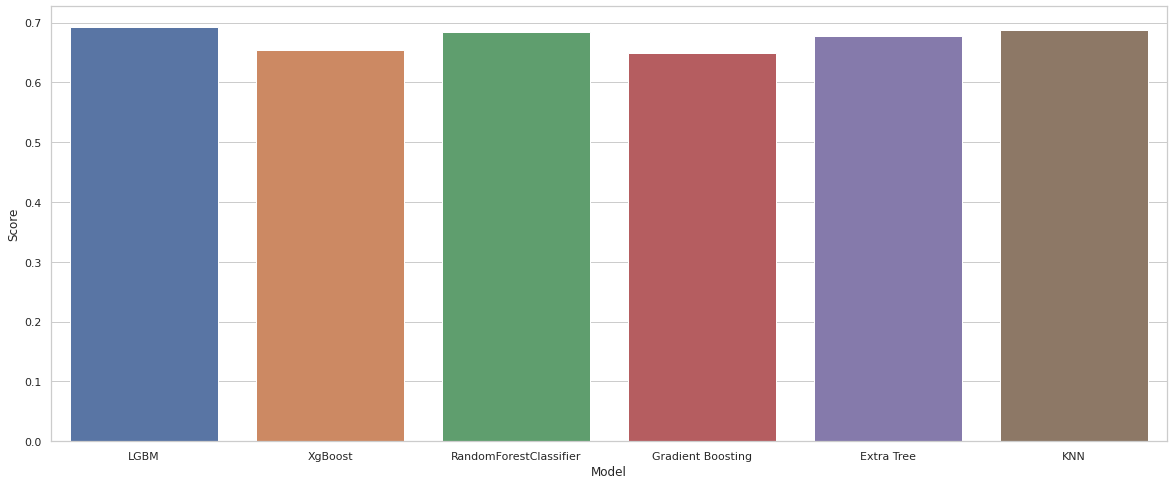

In [53]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()